In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten ,Dense ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adamax

from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_with_mask_dir = '/content/drive/MyDrive/with_mask'
data_without_mask_dir = '/content/drive/MyDrive/without_mask'

In [ ]:
data_with_mask= os.listdir(data_with_mask_dir)[:5]
data_without_mask= os.listdir(data_without_mask_dir)[:5]

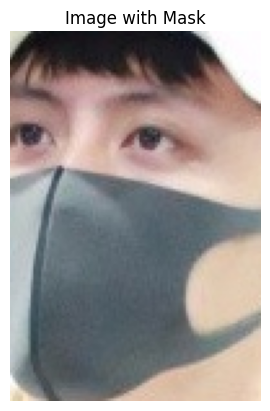

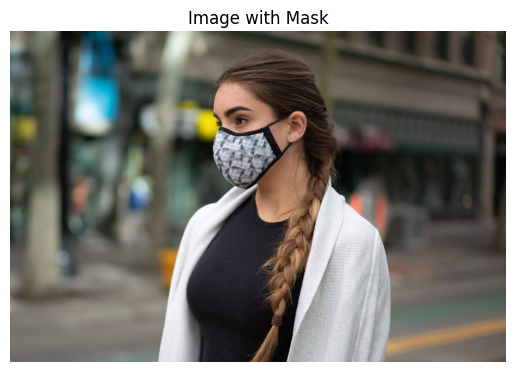

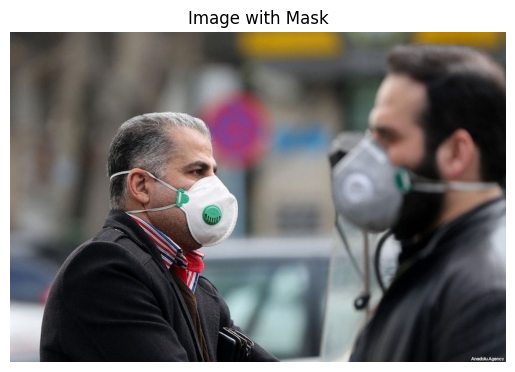

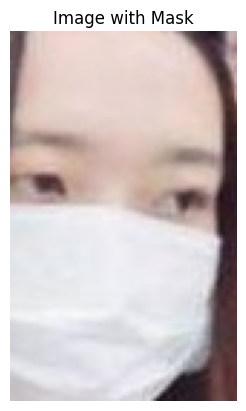

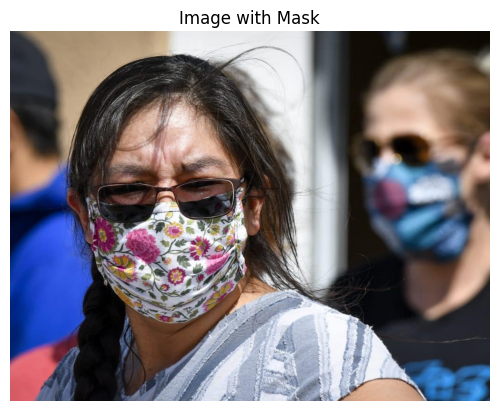

In [ ]:
for img_file in data_with_mask:
    img_path = os.path.join(data_with_mask_dir, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Image with Mask')
    plt.axis('off')
    plt.show()

In [ ]:
data_with_mask= os.listdir(data_with_mask_dir)
data_without_mask= os.listdir(data_without_mask_dir)

In [ ]:
print('Number of without mask images:', len(data_without_mask))

Number of without mask images: 3828


In [ ]:
print('Number of with mask images:', len(data_with_mask))

Number of with mask images: 3725


In [ ]:
with_mask_labels = [1]*len(data_with_mask)
print(f"With Mask labels" ,with_mask_labels[0:10])

without_mask_labels = [0]*len(data_without_mask)
print(f"Without Mask Labels", without_mask_labels[0:10])

With Mask labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Without Mask Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
Labels = with_mask_labels + without_mask_labels
print(f"Labels", Labels[0:10])
print(f"Labels", Labels[-10:])

Labels [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Labels [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
images = []
def load_images_from_folder(folder):

    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        img = img.resize((128,128))
        img = img.convert('RGB')
        images.append(np.array(img))
    return images

with_mask_images = load_images_from_folder('/content/drive/MyDrive/with_mask')
without_mask_images = load_images_from_folder('/content/drive/MyDrive/without_mask')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(images)

7553

In [ ]:
images[0].shape

(128, 128, 3)

In [ ]:
X = np.array(images)
Y = np.array(Labels)

In [ ]:
print(X.shape)

(7553, 128, 128, 3)


In [ ]:
print(Y.shape)

(7553,)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (6042, 128, 128, 3)
Shape of Y_train is: (6042,)

Shape of X_test is: (1511, 128, 128, 3)
Shape of Y_test is: (1511,)


In [ ]:
#scaling the data
X_train = X_train/255
X_test = X_test/255

In [ ]:
image_size = (128,128)
channels = 3
image_shape = (image_size[0],image_size[1], channels)

base_model = tf.keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
     input_shape=image_shape)

model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(256, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(128, activation ='relu'),
    Dropout(rate=0.2),
    BatchNormalization(),
    Dense(64, activation ='relu'),
    Dropout(rate=0.2),
    Dense(2, activation ='sigmoid')

])

234545216/234545216 [==============================] - 1s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 4, 4, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 batch_normalization (Batch  (None, 32768)             131072    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 [==============================] - 137s 320ms/step - loss: 0.2459 - accuracy: 0.8974 - val_loss: 0.0904 - val_accuracy: 0.9669
Epoch 2/10
170/170 [==============================] - 49s 291ms/step - loss: 0.0812 - accuracy: 0.9730 - val_loss: 0.0294 - val_accuracy: 0.9884
Epoch 3/10
170/170 [==============================] - 50s 292ms/step - loss: 0.0358 - accuracy: 0.9904 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 4/10
170/170 [==============================] - 49s 286ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0265 - val_accuracy: 0.9884
Epoch 5/10
170/170 [==============================] - 49s 285ms/step - loss: 0.0200 - accuracy: 0.9958 - val_loss: 0.0314 - val_accuracy: 0.9901
Epoch 6/10
170/170 [==============================] - 49s 286ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.0431 - val_accuracy: 0.9884
Epoch 7/10
170/170 [==============================] - 50s 293ms/step - loss: 0.0238 - accuracy: 0.9917 - val_loss: 0.0335 - val_a

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 5s 98ms/step - loss: 0.0605 - accuracy: 0.9795
Test Accuracy = 0.9794837832450867


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred))

48/48 [==============================] - 7s 76ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       750
           1       0.97      0.99      0.98       761

    accuracy                           0.98      1511
   macro avg       0.98      0.98      0.98      1511
weighted avg       0.98      0.98      0.98      1511



In [ ]:
import matplotlib.image as mpimg

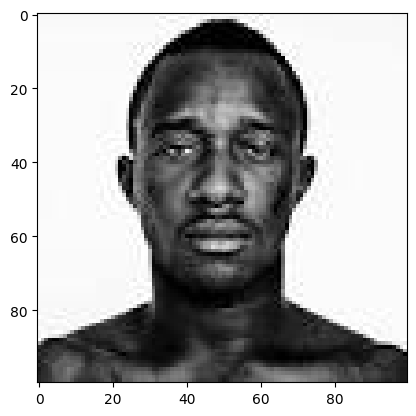

1/1 [==============================] - 2s 2s/step
[[0.9992774  0.00721096]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = '/content/drive/MyDrive/without_mask/without_mask_1.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(np.real(input_image))
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)
print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

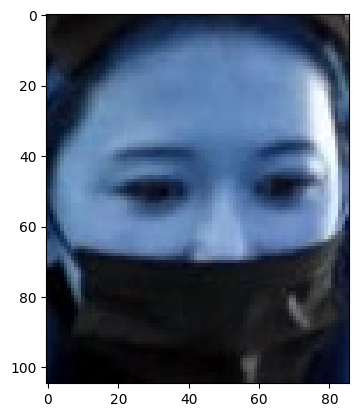

1/1 [==============================] - 0s 75ms/step
[[0.1413703  0.94469947]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = '/content/drive/MyDrive/with_mask/with_mask_100.jpg'

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

